In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import tqdm
from astropy.constants import m_p, M_sun
import astropy.units as u
import matplotlib as mpl
from scipy.interpolate import interp1d
from scipy.interpolate import splrep, BSpline
from plotting_setup import *


sys.path.append('../pipeline_scripts/')
from pipeline_main_nosink import pipeline_nosink
from pipeline_2D_nosink import to_osyris_ivs
from pipeline_main import sink_positions, serialize_directory, sinks, true_sinks, pipeline, calc_ang

core_data = {}
initial_sn = [158, 222, 176, 212, 235, 341, 401, 403, 445]



In [2]:
data = pipeline(223, 'sink13fmr05', 13)

Initialising patch data
Assigning relative cartesian velocities and coordinates to all cells
Assigning masses to all cells
Calculating adiabatic index γ and pressure (polytropic) for all cells


100%|██████████| 4165/4165 [00:18<00:00, 223.25it/s]


In [3]:
0.5**20 * data.au_length *0.5**4

0.049181800475095044

In [4]:
0.5**26 * data.au_length

0.012295450118773761

In [5]:
plot_data = serialize_directory(filename = 'fmr05_accretion_spheres.pkl', store = False)

In [6]:
from scipy.ndimage import uniform_filter1d

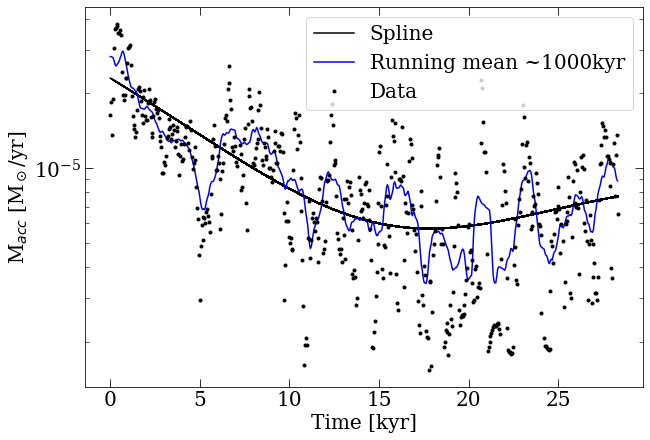

In [7]:
sink = 180
t = plot_data[sink]['sink_time']
x = (t - t[0]) * 1e-3
y = plot_data[sink]['M_dot']
tck_s = splrep(x, y,s = 1, k = 3)
x_new = np.linspace((t - t[0]) * 1e-3, (t[-1] - t[0]) * 1e-3, 200)



running_mean = uniform_filter1d(y, size=20)


fig, axs = plt.subplots(figsize = (10,7))
axs.set(ylabel = 'M$_{acc}$ [M$_\odot$/yr]', xlabel = 'Time [kyr]')

axs.semilogy(x_new, BSpline(*tck_s)(x_new), '-', label=f'Spline' , color = 'black');
axs.semilogy(x, running_mean, color = 'Blue', label = 'Running mean ~1000kyr')
axs.semilogy(x, y, '.', color = 'black', label = 'Data')

handles, labels = axs.get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
axs.legend(*zip(*unique))


No handles with labels found to put in legend.
/tmp/ipykernel_557144/430743871.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


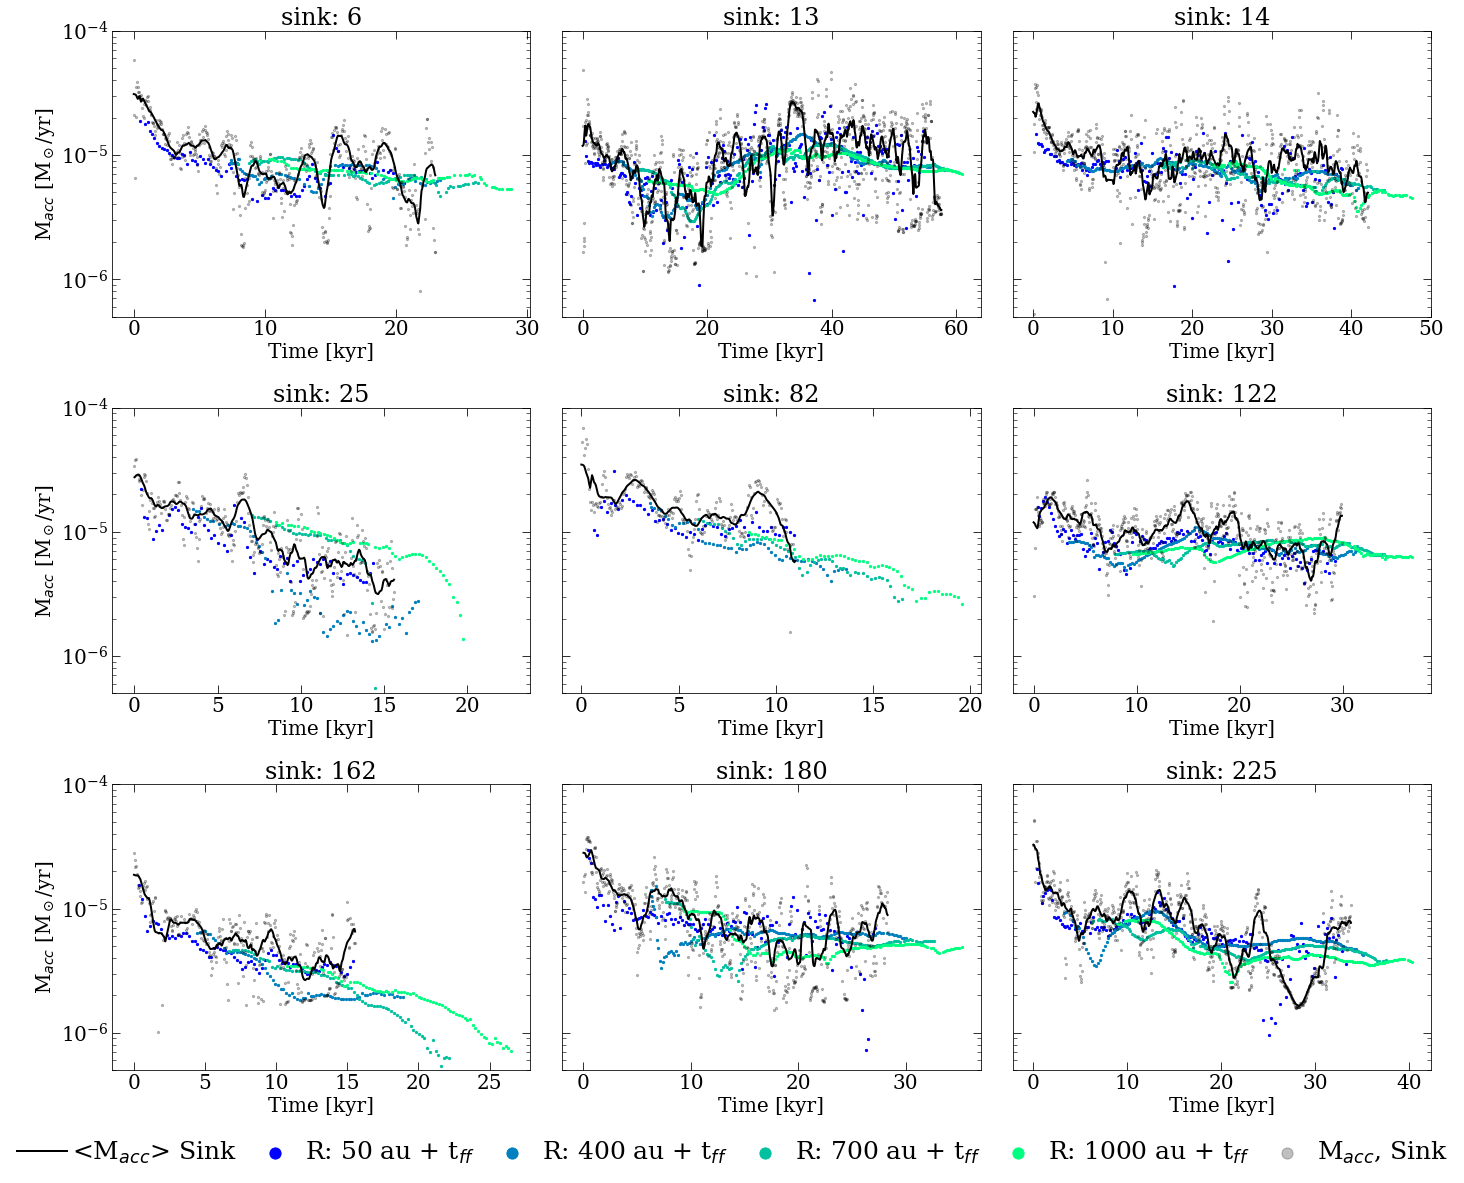

In [8]:
colors = plt.cm.winter(np.linspace(0,1, 5))

fig, axs = plt.subplots(3,3, figsize = (20,16), sharey = True)

for j, (sink, ax) in enumerate(zip(sinks, axs.flatten())):
 
    
    for i, param in enumerate([50, 200, 400, 700, 1000, 'M_dot']):
        if param == 200: continue
        if param == 'M_dot': 
            t = plot_data[sink]['sink_time']
            running_mean = uniform_filter1d(plot_data[sink][param], size=20)
            ax.plot((t - t[0]) * 1e-3, running_mean, color = 'black', ls = '-', lw = 2, label = '<M$_{acc}$> Sink')
            ax.scatter((t - t[0]) * 1e-3, plot_data[sink][param], marker = '.', s = 20, color = 'black', label = 'M$_{acc}$, Sink', alpha = 0.25)
        else: 
            t = plot_data[sink]['time']
            ax.scatter((t - t[0] + plot_data[sink]['t_ff'][i]) * 1e-3, plot_data[sink][param], marker = '.', s = 20, label = f'R: {param} au + t$_{{ff}}$', color = colors[i])
            #ax.plot((t - t[0] + plot_data[sink]['t_ff'][i]) * 1e-3, plot_data[sink][param], '-', label = f'R: {param} au + t$_{{ff}}$')
        ax.set_yscale('log'); ax.set(ylabel = 'M$_{acc}$ [M$_\odot$/yr]', title = f'sink: {sink}', xlabel = 'Time [kyr]', ylim = (5e-7, 1e-4))
    if (j != np.array([0, 3, 6])).all(): ax.set_ylabel('')

cbaxes = fig.add_axes([0.1, 0.02, 0.8, 0.05])
handles, labels = axs[-1, -1].get_legend_handles_labels()

#lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
#lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

cbaxes.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
cbaxes.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), 
              frameon = False, ncol=6, prop = {'size':25}, 
              columnspacing=0.5, handletextpad=0.2, markerscale  = 5)
cbaxes.axis('off')


#fig.legend()
plt.tight_layout()
fig.savefig(save_folder + 'infall_allsinks', facecolor = 'w', bbox_inches='tight', dpi = 500)

In [23]:
t = plot_data[13]['M_star']
len(t), np.unique(t).shape

(574, (561,))

In [21]:
t = plot_data[122]['sink_time']
len(t), np.unique(t).shape

(598, (598,))

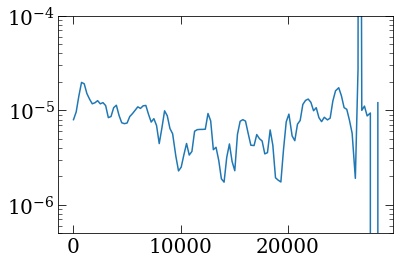

In [4]:
skip = 5
plt.ylim(5e-7, 1e-4)
plt.semilogy(plot_data[13]['sink_time'][::skip] - plot_data[13]['sink_time'][0], np.gradient(plot_data[13]['M_star'][::skip], plot_data[13]['sink_time'][::skip] - plot_data[13]['sink_time'][0]))

No handles with labels found to put in legend.
/tmp/ipykernel_557144/4007427494.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


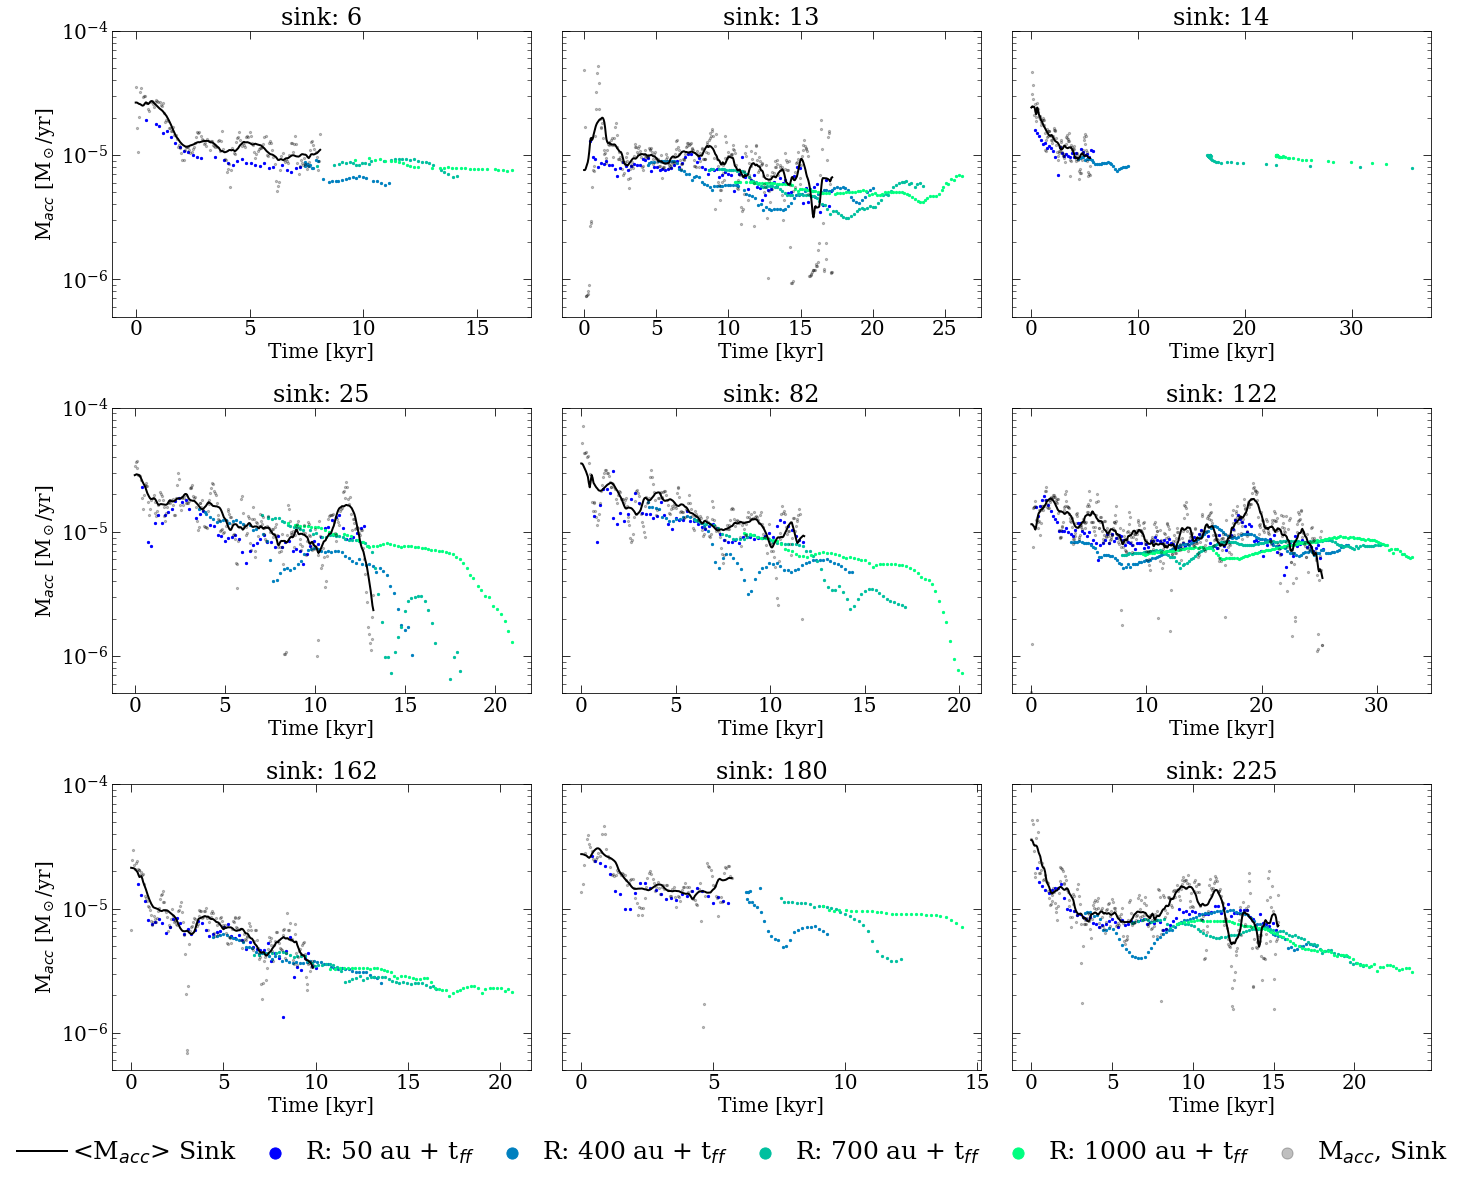

In [10]:
plot_data = serialize_directory(filename = 'fmr06_accretion_spheres.pkl', store = False)


colors = plt.cm.winter(np.linspace(0,1, 5))

fig, axs = plt.subplots(3,3, figsize = (20,16), sharey = True)

for j, (sink, ax) in enumerate(zip(sinks, axs.flatten())):
 
    
    for i, param in enumerate([50, 200, 400, 700, 1000, 'M_dot']):
        if param == 200: continue
        if param == 'M_dot': 
            t = plot_data[sink]['sink_time']
            running_mean = uniform_filter1d(plot_data[sink][param], size=20)
            ax.plot((t - t[0]) * 1e-3, running_mean, color = 'black', ls = '-', lw = 2, label = '<M$_{acc}$> Sink')
            ax.scatter((t - t[0]) * 1e-3, plot_data[sink][param], marker = '.', s = 20, color = 'black', label = 'M$_{acc}$, Sink', alpha = 0.25)
        else: 
            t = plot_data[sink]['time']
            ax.scatter((t - t[0] + plot_data[sink]['t_ff'][i]) * 1e-3, plot_data[sink][param], marker = '.', s = 20, label = f'R: {param} au + t$_{{ff}}$', color = colors[i])
            #ax.plot((t - t[0] + plot_data[sink]['t_ff'][i]) * 1e-3, plot_data[sink][param], '-', label = f'R: {param} au + t$_{{ff}}$')
        ax.set_yscale('log'); ax.set(ylabel = 'M$_{acc}$ [M$_\odot$/yr]', title = f'sink: {sink}', xlabel = 'Time [kyr]', ylim = (5e-7, 1e-4))
    if (j != np.array([0, 3, 6])).all(): ax.set_ylabel('')

cbaxes = fig.add_axes([0.1, 0.02, 0.8, 0.05])
handles, labels = axs[-1, -1].get_legend_handles_labels()

#lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
#lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

cbaxes.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
cbaxes.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), 
              frameon = False, ncol=6, prop = {'size':25}, 
              columnspacing=0.5, handletextpad=0.2, markerscale  = 5)
cbaxes.axis('off')


#fig.legend()
plt.tight_layout()
#fig.savefig(save_folder + 'infall_allsinks', facecolor = 'w', bbox_inches='tight', dpi = 500)